In [14]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import imageio
from PIL import Image as Im
import os
from pathlib import Path
#loading data 
dataset_abs_path = r"C:\Users\k.hamad\Desktop\Dual Images\imageset_2\VNIR.png"  #Enter path
# print(dataset_abs_path)
file_name = "cube_envi32"
png_name = dataset_abs_path
H=np.load(r'C:\Users\k.hamad\Desktop\homographies.npy')


# Source: https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        pixels_clicked.append([x,y])
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +str(g) + ',' + str(r),(x,y), font, 1,(255, 255, 0), 2)
        cv2.imshow('image', img)
    
 

im1 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\VNIR.png')                  # Read image
img = cv2.resize(im1, (im1.shape[1], int(im1.shape[0]/4)))   
cv2.imshow('image', img)

pixels_clicked = []
pixels_pos = cv2.setMouseCallback('image', click_event)
 # wait for a key to be pressed to exit
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()
print(pixels_clicked)
k_1=np.array(pixels_clicked)

im2 = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\SWIR.png')                  # Read image
img = cv2.resize(im2, (im2.shape[1], int(im2.shape[0]/4)))   
cv2.imshow('image', img)
pixels_clicked = []
pixels_pos = cv2.setMouseCallback('image', click_event)
 # wait for a key to be pressed to exit
cv2.waitKey(0)
# close the window
cv2.destroyAllWindows()
print(pixels_clicked)
k_2=np.array(pixels_clicked)
k_11=np.copy(k_1)
k_11[:,1]=k_11[:,1]*4
k_22=np.copy(k_2)
k_22[:,1]=k_22[:,1]*4

478   129
515   361
441   481
761   161
772   341
789   639
936   471
1181   201
1268   349
1249   531
[[478, 129], [515, 361], [441, 481], [761, 161], [772, 341], [789, 639], [936, 471], [1181, 201], [1268, 349], [1249, 531]]
115   265
134   497
92   620
279   302
285   479
297   776
380   611
521   343
573   487
566   674
[[115, 265], [134, 497], [92, 620], [279, 302], [285, 479], [297, 776], [380, 611], [521, 343], [573, 487], [566, 674]]


In [27]:
n=10
k_22[:,1]=k_22[:,1]+n
k_11[:,1]=k_11[:,1]+n

In [34]:
n=10
k_22[:,1]=k_22[:,1]-n
k_11[:,1]=k_11[:,1]-n

In [37]:
n=10
k_22[:,0]=k_22[:,0]+n
k_11[:,0]=k_11[:,0]+n

In [33]:
n=10
k_22[:,0]=k_22[:,0]-n
k_11[:,0]=k_11[:,0]-n

(3500, 1600, 3)


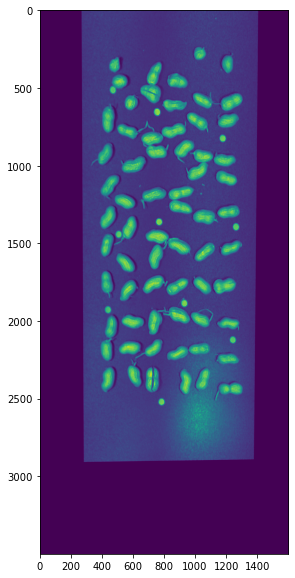

In [38]:
im1  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\VNIR.png')
im2  = cv2.imread(r'C:\Users\k.hamad\Desktop\Dual Images\imageset_12\SWIR.png')
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

h, mask = cv2.findHomography(k_22, k_11, cv2.RANSAC,5)
H2=h.flatten()
# Use homography
height, width, channels = im1.shape
print(im1.shape)
im1Reg = cv2.warpPerspective(img2, h, (width, height))  #Applies a perspective transformation to an image.

# print("Estimated homography : \n",  h)
fig,ax=plt.subplots(figsize=(20,10))
plt.imshow(im1Reg)
plt.savefig('books_read.png')

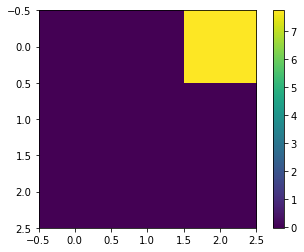

In [39]:
plt.imshow(np.reshape(H1-H2,(3,3)))
plt.colorbar()